In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier


In [14]:
mow = pd.read_csv(r"Datasets\RidingMowers.csv")

In [22]:
dum_mow = pd.get_dummies(mow, drop_first = True)

In [33]:
dum_mow.head()

,Income,Lot_Size,Response_Not Bought
0,34,26,1
1,34,40,1
2,34,46,1
3,34,48,1
4,34,53,1


<AxesSubplot:xlabel='Income', ylabel='Lot_Size'>

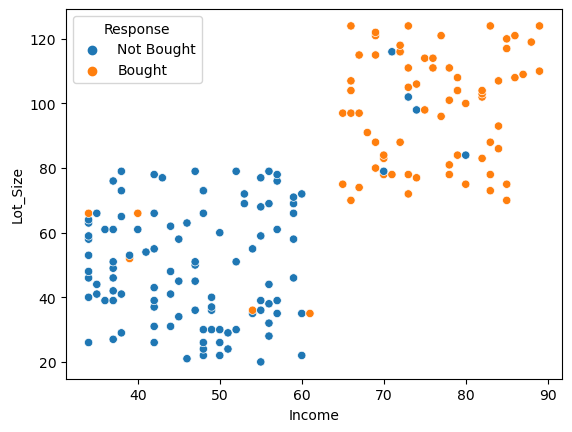

In [24]:
sns.scatterplot(data = mow,
                x = "Income",
                y = "Lot_Size",
                hue = "Response"
               )

In [27]:
X = dum_mow.drop("Response_Not Bought", axis = 1)
y = dum_mow["Response_Not Bought"]


In [63]:
print(X)
print(y)

     Income  Lot_Size
0        34        26
1        34        40
2        34        46
3        34        48
4        34        53
..      ...       ...
175      86       121
176      87       109
177      88       119
178      89       110
179      89       124

[180 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
175    0
176    0
177    0
178    0
179    0
Name: Response_Not Bought, Length: 180, dtype: uint8


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7
                                                   )


In [68]:
print(y_train.value_counts())

1    74
0    51
Name: Response_Not Bought, dtype: int64


In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0]
 [ 1 32]]
0.9818181818181818
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.98        33

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
y_pred = knn.predict(X_test) # below 2 lines of code gives same result

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [77]:
y_pred_prob = knn.predict_proba(X_test)
print(y_pred_prob)

[[0.86666667 0.13333333]
 [0.2        0.8       ]
 [0.         1.        ]
 [0.93333333 0.06666667]
 [0.06666667 0.93333333]
 [0.86666667 0.13333333]
 [0.13333333 0.86666667]
 [0.13333333 0.86666667]
 [0.2        0.8       ]
 [0.33333333 0.66666667]
 [0.93333333 0.06666667]
 [0.93333333 0.06666667]
 [0.2        0.8       ]
 [0.86666667 0.13333333]
 [0.93333333 0.06666667]
 [0.06666667 0.93333333]
 [0.06666667 0.93333333]
 [0.06666667 0.93333333]
 [0.         1.        ]
 [0.         1.        ]
 [0.06666667 0.93333333]
 [0.86666667 0.13333333]
 [0.93333333 0.06666667]
 [0.06666667 0.93333333]
 [0.93333333 0.06666667]
 [0.86666667 0.13333333]
 [0.93333333 0.06666667]
 [0.06666667 0.93333333]
 [0.06666667 0.93333333]
 [0.         1.        ]
 [0.06666667 0.93333333]
 [0.26666667 0.73333333]
 [0.         1.        ]
 [0.93333333 0.06666667]
 [0.86666667 0.13333333]
 [0.86666667 0.13333333]
 [0.06666667 0.93333333]
 [0.93333333 0.06666667]
 [0.13333333 0.86666667]
 [0.06666667 0.93333333]


In [72]:
# Probability that y_pred is 1
y_pred_prob2 = knn.predict_proba(X_test)[:,1]
print(y_pred_prob2)

[0.13333333 0.8        1.         0.06666667 0.93333333 0.13333333
 0.86666667 0.86666667 0.8        0.66666667 0.06666667 0.06666667
 0.8        0.13333333 0.06666667 0.93333333 0.93333333 0.93333333
 1.         1.         0.93333333 0.13333333 0.06666667 0.93333333
 0.06666667 0.13333333 0.06666667 0.93333333 0.93333333 1.
 0.93333333 0.73333333 1.         0.06666667 0.13333333 0.13333333
 0.93333333 0.06666667 0.86666667 0.93333333 1.         0.13333333
 0.13333333 0.06666667 0.93333333 0.86666667 0.93333333 0.8
 0.         0.13333333 0.93333333 1.         0.2        0.06666667
 0.86666667]


In [59]:
# Loop for selecting best no of neighbors

acc = []
ks = [x for x in range(1,16,2)]
for i in ks:
    knn = KNeighborsClassifier( n_neighbors = i )
    
    knn.fit( X_train, y_train )
    y_pred = knn.predict( X_test )
    acc.append( accuracy_score( y_test, y_pred ) )

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [80]:
i_max = np.argmax(acc)
best_k = ks[i_max]

print("Best nearest neighbors : ", best_k)

Best nearest neighbors :  3


In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

In [87]:
# Loop

acc2 = []
Ks2 = [x for x in range(1,16,2)]

for i in Ks2:
    knn = KNeighborsClassifier( n_neighbors = i )
    knn.fit(X_train, y_train)
    y_pred_prob = knn.predict_proba(X_test)[:,1]
    acc2.append(roc_auc_score(y_test, y_pred_prob))

In [89]:
i_max = np.argmax(acc2)
best_k = Ks2[i_max]
print("Best n_neighbors = ", best_k)
print(roc_auc_score(y_test, y_pred_prob))

Best n_neighbors =  3
0.977961432506887
